# Gradient Descent

In this exercise, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

We will import for you the following dataset of ingredients with their mineral content

In [1]:
import pandas as pd

data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/04-Under-the-Hood/gradient_descent_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 We can visualize a somewhat Linear relationship between the `Phosphorus` and `Zinc`.   

Let's use Gradient Descent to find the line of best fit between them! 

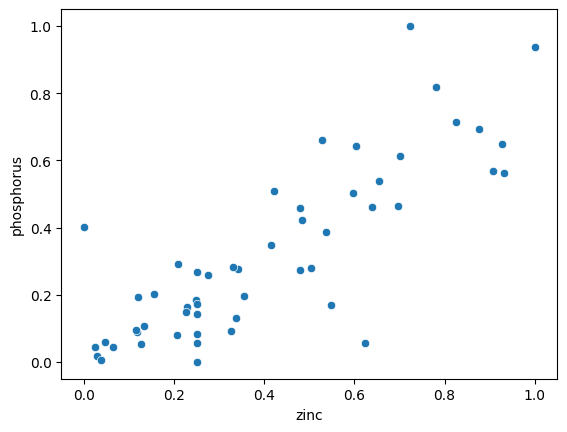

In [2]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

❓ Create the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [3]:
# YOUR CODE HERE
import numpy as np

# Extracting data for zinc and phosphorus
data_X = np.array(data['zinc'])
data_Y = np.array(data['phosphorus'])


In [4]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Code one Epoch

In this section of the exercise, you will define the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Recall the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function

$$
\hat{y} =  a x + b
$$

❓ Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [5]:
# YOUR CODE HERE
def h(X, a, b):
    return a * X + b


### 2.2 Loss Function

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Define the SSR Loss Function for the Hypothesis Function using the equation above. Reuse the function `h` coded above when writing your new function.


In [6]:
# YOUR CODE HERE
def loss(X, Y, a, b):
    return np.sum((Y - h(X, a, b))**2)


❓ What would be the total Loss computed on all our ingredients dataset if:
- a = 1 
- b = 1

In [7]:
# YOUR CODE HERE
a = 1
b = 1
total_loss = loss(data_X, data_Y, a, b)
print(total_loss)


63.868506986115456


⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Define a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b` at a given point.


<details>
<summary>💡 Hint</summary>
Again, you must re-use the Hypothesis Function in your new function to compute the predictions at given points.
</details>

In [8]:
# YOUR CODE HERE
def gradient(X, Y, a, b):
    d_a = -2 * np.sum(X * (Y - h(X, a, b)))
    d_b = -2 * np.sum(Y - h(X, a, b))
    return d_a, d_b


❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [9]:
# YOUR CODE HERE
d_a, d_b = gradient(data_X, data_Y, 1, 1)
print(d_a, d_b)


48.459065809109006 115.17923733301406


⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

❓ Define a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a `learning_rate` equal to `0.01` by default

In [10]:
# YOUR CODE HERE
def steps(d_a, d_b, learning_rate=0.01):
    step_a = d_a * learning_rate
    step_b = d_b * learning_rate
    return step_a, step_b


❓ What would be the steps (`step_a`, `step_b`) to take for the derivatives computed above for (`a`,`b`) = (1,1)?

In [11]:
# YOUR CODE HERE
step_a, step_b = steps(d_a, d_b)
print(step_a, step_b)


0.4845906580910901 1.1517923733301405


⚠️ The steps should be 0.48 for `a` and 1.15 for `b`

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

❓ Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [12]:
# YOUR CODE HERE
def update_params(a, b, step_a, step_b):
    a_new = a - step_a
    b_new = b - step_b
    return a_new, b_new


### 2.6 One full epoch

❓ Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [13]:
# YOUR CODE HERE
a, b = 1, 1
step_a, step_b = steps(*gradient(data_X, data_Y, a, b))
updated_a, updated_b = update_params(a, b, step_a, step_b)
print(updated_a, updated_b)


0.5154093419089099 -0.1517923733301405


⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradient Descent

❓ Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Consider convergence to be **100 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the values for `loss`, `a`, and `b` at each epoch to their corresponding lists called `loss_history`, `a_history` and `b_history`

In [14]:
# YOUR CODE HERE
a, b = 1, 1
n_epochs = 100
learning_rate = 0.01

loss_history = []
a_history = []
b_history = []

for epoch in range(n_epochs):
    d_a, d_b = gradient(data_X, data_Y, a, b)
    step_a, step_b = steps(d_a, d_b, learning_rate)
    a, b = update_params(a, b, step_a, step_b)
    
    # Storing the values at each epoch
    loss_history.append(loss(data_X, data_Y, a, b))
    a_history.append(a)
    b_history.append(b)



❓ What are the parameter values at the end of the 100 epochs? Save them to respective variables `a_100` and `b_100` 

In [15]:
# Storing the final values for testing
a_100 = a
b_100 = b

print(a_100, b_100)


0.768671510620374 0.00708932115622393


In [16]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/amralghasham/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/amralghasham/code/Amralghasham/data-batch-gradient-descent/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.12s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Visual check

❓ Wrap this iterative approach into a method `gradient_descent()` which returns your `new_a`, `new_b` and `history`, a dictionary containing these lists: 
- `loss_history`
- `a_history`
- `b_history`

In [17]:
# YOUR CODE HERE
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    a, b = a_init, b_init
    loss_history, a_history, b_history = [], [], []
    
    for epoch in range(n_epochs):
        d_a, d_b = gradient(X, Y, a, b)
        step_a, step_b = steps(d_a, d_b, learning_rate)
        a, b = update_params(a, b, step_a, step_b)
        
        loss_history.append(loss(X, Y, a, b))
        a_history.append(a)
        b_history.append(b)
    
    history = {'loss': loss_history, 'a': a_history, 'b': b_history}
    return a, b, history


❓ Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

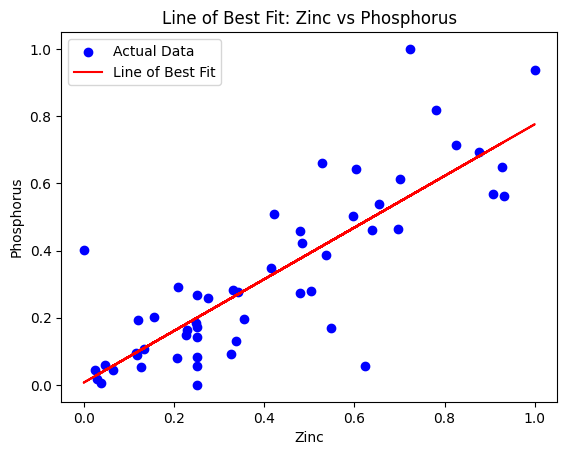

In [18]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Use the final parameters from Gradient Descent to calculate predicted values
a_final, b_final, _ = gradient_descent(data_X, data_Y, learning_rate=0.01, n_epochs=100)

# Predicted phosphorus values using the final `a` and `b`
y_pred = h(data_X, a_final, b_final)

# Plot the original scatterplot of zinc and phosphorus
plt.scatter(data_X, data_Y, color='blue', label='Actual Data')

# Plot the line of best fit
plt.plot(data_X, y_pred, color='red', label='Line of Best Fit')

# Labels and title
plt.xlabel('Zinc')
plt.ylabel('Phosphorus')
plt.title('Line of Best Fit: Zinc vs Phosphorus')
plt.legend()
plt.show()


## 5. Visualize your descent

🎯 Our goal is to plot our loss function and the gradient descent steps on a 2D surface using matplotlib's `contourf`

❓ Start by creating the data we need for the plot
- `range_a`: a range of 100 values for `a` equally spaced between -1 and 1
- `range_b`: a range of 100 values for `b` equally spaced between -1 and 1 
- `Z`: a 2D-array where each element `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [20]:


# Step 1: Create a range of values for `a` and `b`
range_a = np.linspace(-1, 1, 100)
range_b = np.linspace(-1, 1, 100)

# Step 2: Create a 2D-array `Z` where each Z[j, i] is the loss for a given a=range_a[i] and b=range_b[j]
Z = np.zeros((len(range_b), len(range_a)))

# Populate the Z matrix with loss values
for j in range(len(range_b)):
    for i in range(len(range_a)):
        Z[j, i] = loss(data_X, data_Y, range_a[i], range_b[j])


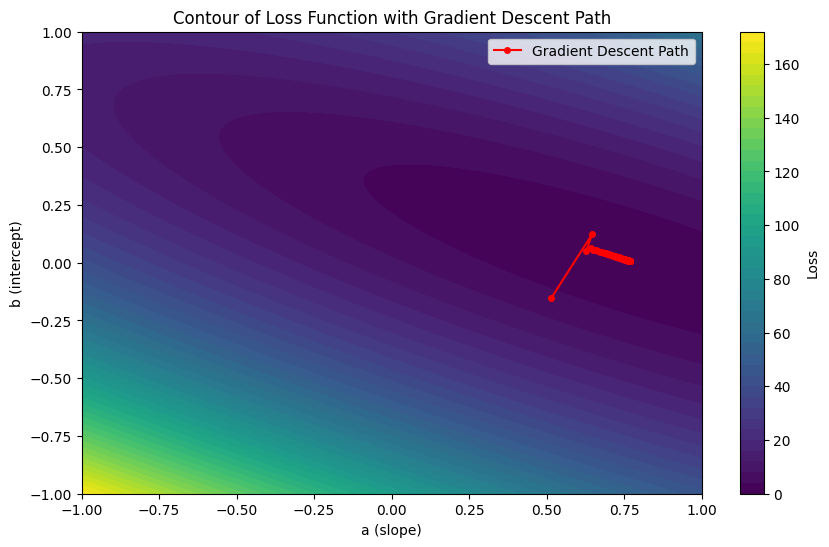

In [21]:
# YOUR CODE HERE

# Step 3: Plot the contour of the loss function
plt.figure(figsize=(10, 6))
plt.contourf(range_a, range_b, Z, levels=50, cmap="viridis")

# Perform gradient descent and get the history of `a` and `b`
a_init, b_init = 1, 1
a_final, b_final, history = gradient_descent(data_X, data_Y, a_init, b_init, learning_rate=0.01, n_epochs=100)

# Step 4: Overlay the gradient descent path (red dots)
plt.plot(history['a'], history['b'], 'ro-', markersize=4, label='Gradient Descent Path')

# Labels and title
plt.xlabel('a (slope)')
plt.ylabel('b (intercept)')
plt.title('Contour of Loss Function with Gradient Descent Path')
plt.colorbar(label='Loss')
plt.legend()
plt.show()


❓ Now, plot in one single subplot:
- your loss function as a 2D-surface using matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with 3 parameters
- all historical (a,b) points as a scatterplot with red dots to visualize your gradient descent!

Change your learning rate and observe its impact on the graph!

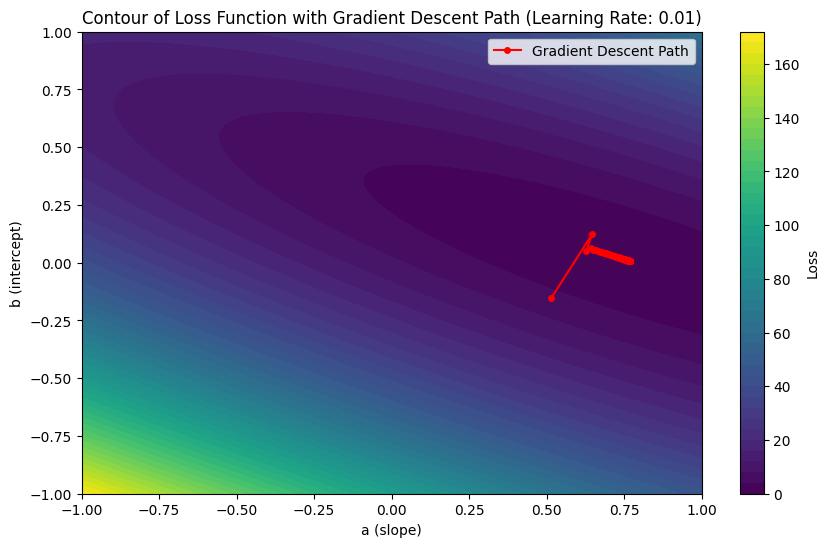

In [22]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a range of values for `a` and `b`
range_a = np.linspace(-1, 1, 100)
range_b = np.linspace(-1, 1, 100)

# Step 2: Create a 2D-array `Z` where each Z[j, i] is the loss for a given a=range_a[i] and b=range_b[j]
Z = np.zeros((len(range_b), len(range_a)))

# Populate the Z matrix with loss values
for j in range(len(range_b)):
    for i in range(len(range_a)):
        Z[j, i] = loss(data_X, data_Y, range_a[i], range_b[j])

# Step 3: Perform gradient descent and get the history of `a` and `b`
a_init, b_init = 1, 1
learning_rate = 0.01  # Feel free to change this and observe the impact
a_final, b_final, history = gradient_descent(data_X, data_Y, a_init, b_init, learning_rate, n_epochs=100)

# Step 4: Plot the contour of the loss function
plt.figure(figsize=(10, 6))
plt.contourf(range_a, range_b, Z, levels=50, cmap="viridis")

# Step 5: Overlay the gradient descent path (red dots)
plt.plot(history['a'], history['b'], 'ro-', markersize=4, label='Gradient Descent Path')

# Labels and title
plt.xlabel('a (slope)')
plt.ylabel('b (intercept)')
plt.title(f'Contour of Loss Function with Gradient Descent Path (Learning Rate: {learning_rate})')
plt.colorbar(label='Loss')
plt.legend()
plt.show()


❓ [optional] What about 3D? Try to plot the same data on a [plot.ly 3D contour plot](https://plotly.com/python/3d-surface-plots/) below

In [ ]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

❓ Plot the history of the `loss` values as a function of the number of `epochs`. Try with multiple variations of `learning_rate` from 0.001 to 0.01 and make sure to understand the difference

In [ ]:
# YOUR CODE HERE


## 6. With Sklearn...

❓ Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [23]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

# Reshape the data_X for sklearn (it expects a 2D array)
data_X_reshaped = data_X.reshape(-1, 1)

# Step 1: Train the Linear Regression model
model = LinearRegression()
model.fit(data_X_reshaped, data_Y)

# Step 2: Get the parameters from the model
a_sklearn = model.coef_[0]  # The slope (coefficient)
b_sklearn = model.intercept_  # The intercept

print(f"Slope (a) from Sklearn: {a_sklearn}")
print(f"Intercept (b) from Sklearn: {b_sklearn}")

# Step 3: Compare with the Gradient Descent results
a_gd, b_gd, _ = gradient_descent(data_X, data_Y, learning_rate=0.01, n_epochs=100)

print(f"Slope (a) from Gradient Descent: {a_gd}")
print(f"Intercept (b) from Gradient Descent: {b_gd}")


Slope (a) from Sklearn: 0.7688371715345803
Intercept (b) from Sklearn: 0.0070177202010621165
Slope (a) from Gradient Descent: 0.768671510620374
Intercept (b) from Gradient Descent: 0.00708932115622393


They should be almost identical!

### 🏁 Congratulation! Please, push your exercise when you are done